<a href="https://colab.research.google.com/github/ZEVs-top/Test-RANHIGS/blob/main/%D0%94%D0%97_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Базовые понятия статистики"


#**1. Базовое изучение**


In [ ]:
import pandas as pd

columns = [
    "surgery", "age", "hospital_number", "rectal_temp", "pulse", "respiratory_rate",
    "extrem_temp", "peripheral_pulse", "mucous_membranes", "capillary_refill_time",
    "pain", "peristalsis", "abd_distension", "nasogastric_tube", "nasogastric_reflux",
    "nasogastric_reflux_ph", "rectal_exam_feces", "abdomen", "packed_cell_volume",
    "total_protein", "abd_centesis_appearance", "abd_centesis_total_protein", "outcome",
    "surgical_lesion", "lesion_type_1", "lesion_type_2", "lesion_type_3", "cp_data"
]

# Путь к данным
data_path = "https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv"

train_data = pd.read_csv(data_path, header=None, names=columns, na_values="?")

data = pd.concat([train_data], ignore_index=True)

selected_columns = [
    "rectal_temp", "pulse", "respiratory_rate", "packed_cell_volume",  # Числовые
    "surgery", "age", "pain", "outcome"  # Категориальные
]

subset = data[selected_columns]

##**Числовые**


In [ ]:
stats_numeric = subset[["rectal_temp", "pulse", "respiratory_rate", "packed_cell_volume"]].describe().T
stats_numeric['median'] = subset[["rectal_temp", "pulse", "respiratory_rate", "packed_cell_volume"]].median()
stats_numeric['mode'] = subset[["rectal_temp", "pulse", "respiratory_rate", "packed_cell_volume"]].mode().iloc[0]
stats_numeric

,count,mean,std,min,25%,50%,75%,max,median,mode
rectal_temp,240.0,38.167917,0.732289,35.4,37.8,38.2,38.5,40.8,38.2,38.0
pulse,276.0,71.913043,28.630557,30.0,48.0,64.0,88.0,184.0,64.0,48.0
respiratory_rate,242.0,30.417355,17.642231,8.0,18.5,24.5,36.0,96.0,24.5,20.0
packed_cell_volume,271.0,46.295203,10.419335,23.0,38.0,45.0,52.0,75.0,45.0,37.0


Средняя температура составила 38.1 градус. Обычно у заболевающих температура не поднимается выше 38.5 Частота пульса сильно колебается от 30 до 184 ударов в минуту. Заболевание напрямую не влияет на частоту сердечных сокращений. Большинство животных дышат с частотой между 18.5 и 36 дыханий в минуту, что может указывать на некоторые отклонения ввиду заболевания. Среднее значение PCV — 46.3, с показателем на 75-м процентиле в 52, что указывает на некоторые аномалии в уровне гидратации или состоянии крови.

##**Категориальные**
```



In [ ]:
stats_categorical = {}

for column in ["surgery", "age", "pain", "outcome"]:
    value_counts = subset[column].value_counts()
    mode = value_counts.idxmax()
    stats_categorical[column] = {
        "most_frequent_value": mode,
        "frequency": value_counts[mode],
        "unique_values": value_counts.index.tolist(),
    }

stats_categorical_df = pd.DataFrame.from_dict(stats_categorical, orient="index")
stats_categorical_df["unique_values"] = stats_categorical_df["unique_values"].apply(lambda x: ", ".join(map(str, x)))
stats_categorical_df

,most_frequent_value,frequency,unique_values
surgery,1.0,180,"1.0, 2.0"
age,1.0,276,"1, 9"
pain,3.0,67,"3.0, 2.0, 5.0, 4.0, 1.0"
outcome,1.0,178,"1.0, 2.0, 3.0"


Основную часть выборки составляют взрослые животные, что соответствует ожиданиям, так как они чаще сталкиваются с коликами. У большинства лошадей наблюдалась умеренная боль, но встречаются и случаи сильной боли, что указывает на более сложные проблемы. Большинство животных выздоровели, это говорит об эффективности лечения, хотя есть и случаи, когда спасти их не удалось.

#**2. Работа с выбросами**


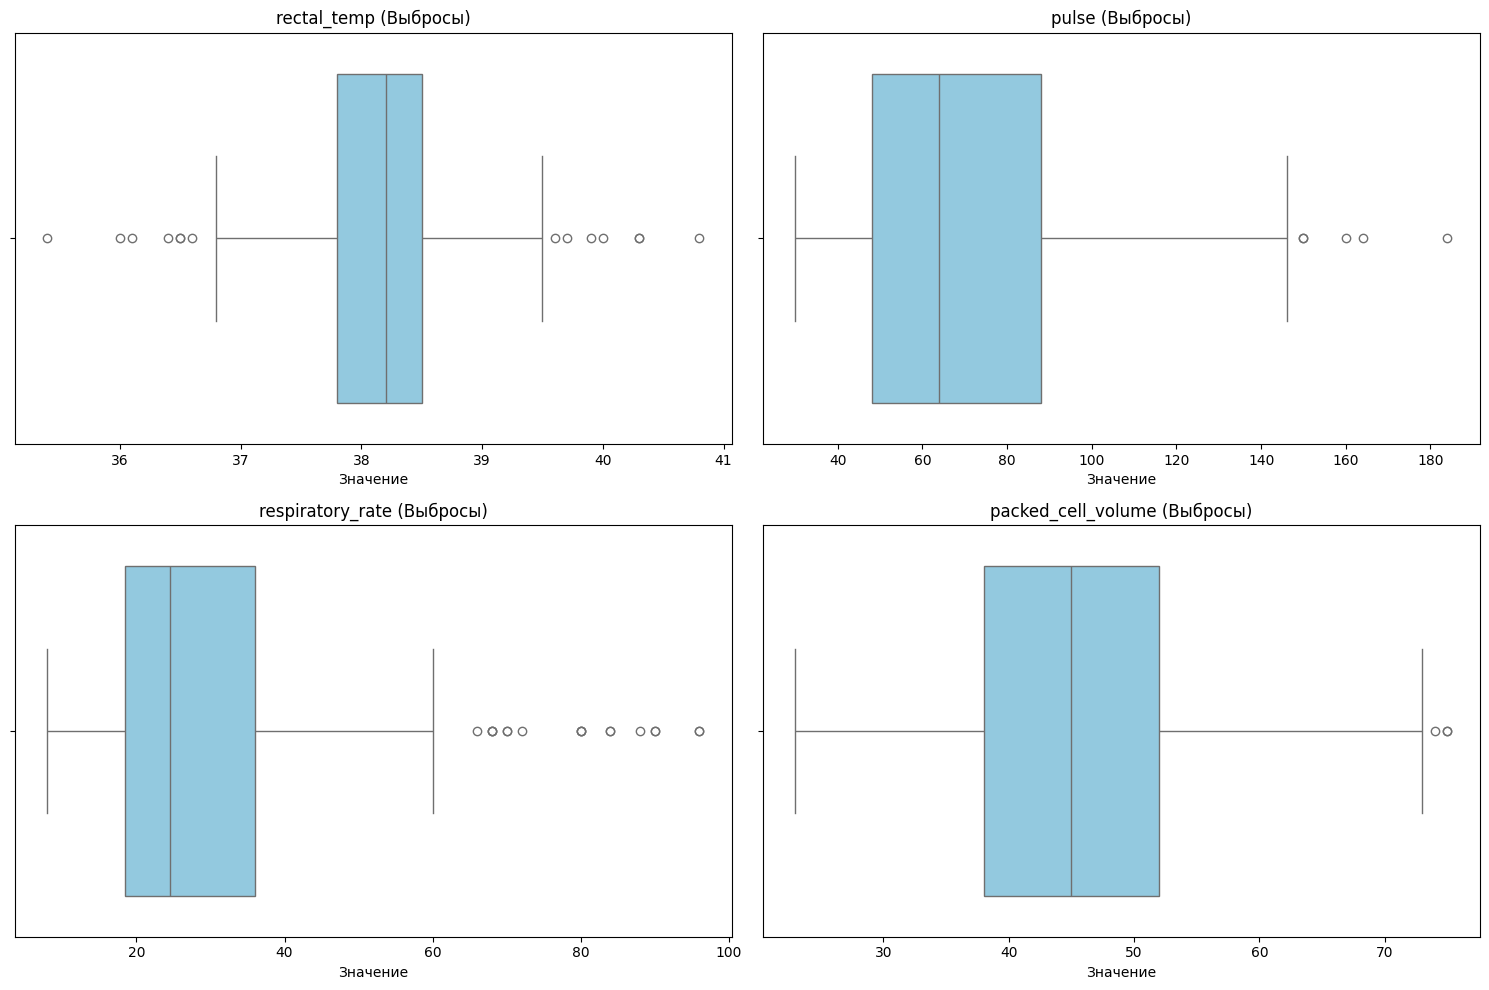

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, column in enumerate(["rectal_temp", "pulse", "respiratory_rate", "packed_cell_volume"]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=subset[column], orient="h", color="skyblue")
    plt.title(f"{column} (Выбросы)")
    plt.xlabel("Значение")

plt.tight_layout()
plt.show()

Что касается ректальной температуры, выбросы могут указывать на лихорадку или гипотермию, что свидетельствует о серьезной инфекции или шоке. Высокий пульс может быть связан с болью, стрессом или даже шоком, в то время как также не исключены ошибки при измерении. Частота дыхания с аномальными значениями может сигнализировать о стрессе, боли или респираторных проблемах. Объем упакованных клеток можно объяснить явлениями дегидратации или анемии.

Рассматривая выбросы, стоит подумать о их исключении, если они являются результатом ошибок, чтобы улучшить качество данных. Однако, если выбросы важны для изучения клинических особенностей, их стоит анализировать отдельно. Это значит, что нужно изучить медицинские записи, чтобы подтвердить причины выбросов и понять клинический контекст. Для дальнейших действий необходимо провести более глубокий анализ влияния разных факторов на данные, а также выявить и исправить возможные ошибки в исходной информации. Подходя к анализу комплексно, можно лучше понять значение выбросов в медицинском контексте данных о лошадях.

#**3. Работа с пропусками**

In [ ]:
subset.isna().sum()

,0
rectal_temp,60
pulse,24
respiratory_rate,58
packed_cell_volume,29
surgery,1
age,0
pain,55
outcome,1


In [ ]:
for column in ["rectal_temp", "pulse", "respiratory_rate", "packed_cell_volume"]:
    subset.loc[:, column] = subset[column].fillna(subset[column].median())

for column in ["surgery", "age", "pain", "outcome"]:
    subset.loc[:, column] = subset[column].fillna(subset[column].mode()[0])

In [ ]:
subset.isna().sum()

,0
rectal_temp,0
pulse,0
respiratory_rate,0
packed_cell_volume,0
surgery,0
age,0
pain,0
outcome,0


Принято решение заменить пропуски в числовых столбцах ("rectaltemp", "pulse", "respiratoryrate", "packedcellvolume") медианными значениями. Этот подход выбран, потому что медиана является устойчивой к выбросам, обеспечивая минимальное искажение распределения данных. Для категориальных столбцов ("surgery", "age", "pain", "outcome") пропуски заменены на модальные значения (наиболее часто встречающиеся). Это позволяет сохранить распределение категориальных данных, не внося значительных изменений в их частотную структуру. Таким образом, мы обеспечиваем полное отсутствие пропусков в данных, сохраняя при этом их статистические свойства.